In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm


data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

lb_0 = np.column_stack([x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])


In [0]:
def g(data):
    result = []
    for t in range(100):
        i = t // 10
        j = t % 10
        result.append(data[0,:]**i * data[1,:]**j)
    return np.array(result)


def partialDiff(t):
    i = t // 10
    j = t % 10
    return data[:,0]**i * data[:,1]**j


In [0]:
alpha = 0.01
p_lambda = 0
m = len(train_set)

def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def z(th, x):
    return np.matmul(th,g(x))

def J(th, data): 
    return (1/m) * np.sum(                                                   \
        - data[:,2] * np.log(h(th,np.transpose(data[:,0:2])))                  \
        - (1-data[:,2]) * np.log(1 - h(th,np.transpose(data[:,0:2])))          \
        ) + (p_lambda/2) * np.sum(th**2)


def accuracy():
    answer = train_set[:,2]
    guess = np.around(h(g_th,np.transpose(train_set[:,0:2])))
    return np.sum(np.equal(answer, guess)) / m


def th_cal(th):
    result = []
    diff = h(th, np.transpose(train_set[:,0:2])) - train_set[:,2]
    
    for j in range(len(th)):
        result.append( th[j]-(alpha * (   (1/m) * np.sum(  diff * partialDiff(j) ) + p_lambda*th[j]    )   ))
    return np.array(result)


In [0]:
g_th = np.array(np.ones(100))
J_log_train = [J(g_th, train_set)]
th_log = [g_th]
accuracy_log = [accuracy()]

# import sys
e = 5*10 ** (-14)



In [83]:
from tqdm.notebook import tqdm
for i in tqdm(range(1000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    th_log.append(g_th)
    accuracy_log.append(accuracy())
    if abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break




---



#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




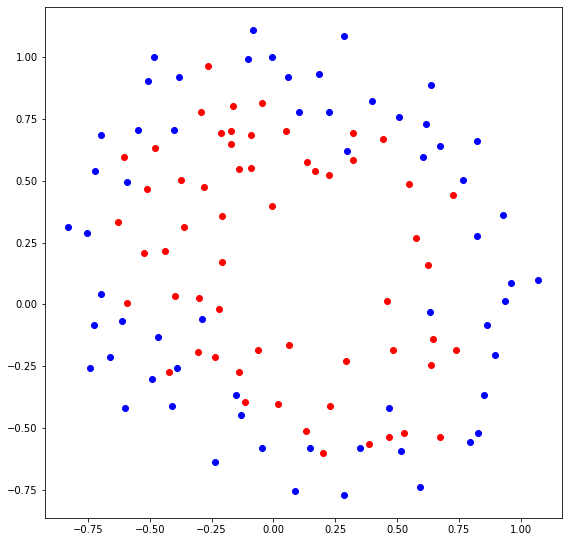

In [84]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##### 2. Plot the training error with varying regularization parameters
- choose a value for $\lambda_1$ in such a way that `over-fitting` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in red color) [3pt]
- choose a value for $\lambda_2$ in such a way that `just-right` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in green color) [3pt]
- choose a value for $\lambda_3$ in such a way that `under-fitting` is demonstrated and plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure


##### 3. Display the values of the chosen regularization parameters
- display the value of the chosen $\lambda_1$ for the demonstration of `over-fitting` (in red color) [1pt]
- display the value of the chosen $\lambda_2$ for the demonstration of `just-right` (in green color) [1pt]
- display the value of the chosen $\lambda_3$ for the demonstration of `under-fitting` (in blue color) [1pt]



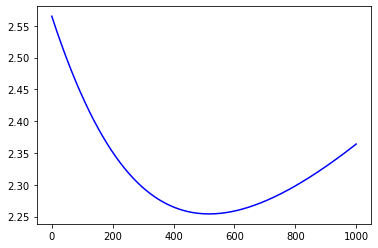

In [85]:
plt.plot(J_log_train,c='blue')
plt.show()

##### 4. Plot the training accuracy with varying regularization parameters
- plot the training accuracy with the chosen $\lambda_1$ for `over-fitting` at every iteration of gradient descent until convergence (in red color) [3pt]
- plot the training accuracy with the chosen $\lambda_2$ for `just-right` at every iteration of gradient descent until convergence (in green color) [3pt]
- plot the training accuracy with the chosen $\lambda_3$ for `under-fitting` at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure


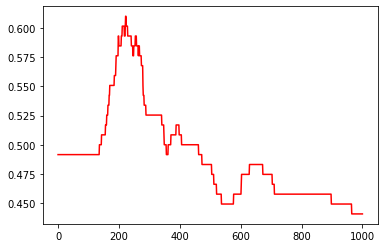

1001

In [86]:
plt.plot(accuracy_log,c='red')
plt.show()
len(accuracy_log)

##### 5. Display the final training accuracy with varying regularization parameters
- display the final training accuracy obtained with the chosen $\lambda_1$ for `over-fitting` in number (%) at convergence (in red color) [1pt]
- display the final training accuracy obtained with the chosen $\lambda_2$ for `just-right` in number (%) at convergence (in green color) [1pt]
- display the final training accuracy obtained with the chosen $\lambda_3$ for `under-fitting` in number (%) at convergence (in blue color) [1pt]



In [87]:
print(accuracy()*100,"%")

44.06779661016949 %


##### 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data
- plot the boundary of the optimal classifier with the chosen $\lambda_1$ for `over-fitting` at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen $\lambda_2$ for `just-right` at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen $\lambda_3$ for `under-fitting` at convergence (in blue color) [3pt]
- the boundary of the classifier is defined by $\{ (x, y) \mid \sigma(g(x, y ; \theta)) = 0.5 \} = \{ (x, y) \mid g(x, y ; \theta) = 0 \}$
- the boundaries of the classifiers with different regularization parameters should be presented with the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)
- you can use `contour` function in python3



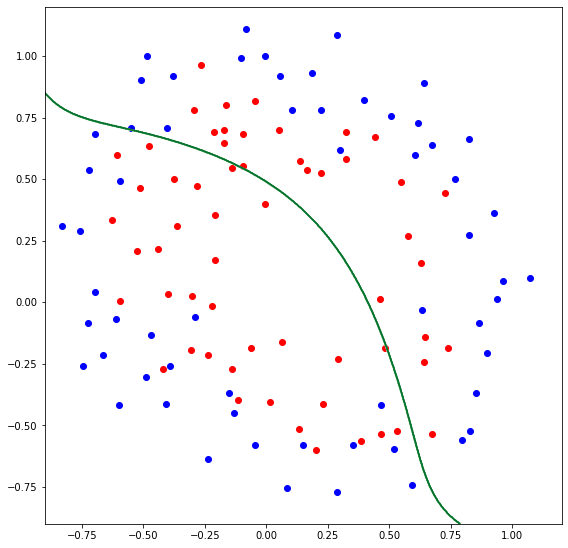

In [88]:
X, Y = np.meshgrid(np.linspace(-0.9, 1.2, 1000), np.linspace(-0.9, 1.2, 1000))


Z = np.array([  np.around( h(g_th, np.array([x,y]) ) )      for x,y in zip(X,Y)  ])

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, cmap='Greens')

plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')


plt.show()

